In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
from sklearn.metrics import *

warnings.filterwarnings('ignore')

In [2]:
train_feat = pd.read_csv('train_data.csv', index_col=0)
test_feat = pd.read_csv('test_data.csv', index_col=0)
train_flag = pd.read_csv('train_flag.csv', index_col=0)

In [3]:
train_flag

,id_level_1,default_in_1y_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,5,0
...,...,...
43802,54318,0
43803,54320,0
43804,54321,0
43805,54322,0


In [4]:
tab_2 = train_feat[['amount', 'count', 'id_level_1']].groupby(by='id_level_1').agg(['mean','sum'])
tab_2 = tab_2.reset_index().merge(train_flag, on='id_level_1', how='inner').drop('id_level_1', axis=1)

tab_2.columns = ['id_level_1','feat_1','feat_2','feat_3','feat_4','default_in_1y_flag']
tab_2

,id_level_1,feat_1,feat_2,feat_3,feat_4,default_in_1y_flag
0,0,444.238835,45756.60,47.203883,4862,0
1,1,42.773830,6031.11,4.482270,632,0
2,2,337.442923,21933.79,35.738462,2323,0
3,3,591.172711,98134.67,60.704819,10077,0
4,5,71.208692,7619.33,7.093458,759,0
...,...,...,...,...,...,...
43802,54318,215.485269,20040.13,21.279570,1979,0
43803,54320,64.468171,5286.39,6.341463,520,0
43804,54321,10.800000,32.40,1.000000,3,0
43805,54322,180.515341,31770.70,18.960227,3337,0


In [5]:
X_train, X_val, y_train, y_val = train_test_split(tab_2.drop(['id_level_1','default_in_1y_flag'], axis=1), 
                                                   tab_2['default_in_1y_flag'], test_size=0.3, random_state=43)
model = LogisticRegression(random_state=0, max_iter=1000, solver='newton-cg').fit(X_train, y_train)

0.378 val
0.372 train


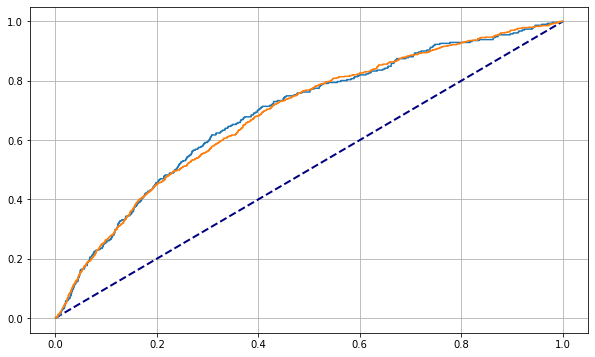

In [6]:
y_val_scores = model.predict_proba(X_val)[:,1]
print(round(2 * roc_auc_score(y_val, y_val_scores)-1, 3), 'val')


y_train_scores = model.predict_proba(X_train)[:,1]
print(round(2 * roc_auc_score(y_train, y_train_scores)-1, 3), 'train')

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_scores)
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr,tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_scores)
plt.plot(fpr,tpr)
plt.grid(True)
plt.show()

In [7]:
tab_3 = test_feat[['amount','count','id_level_1']].groupby(by='id_level_1').agg(['mean','sum']).reset_index()
tab_3.columns=['id_level_1','feat_1','feat_2','feat_3','feat_4']
tab_3['score']=model.predict_proba(tab_3.drop(['id_level_1'], axis=1))[:,1]
submit=tab_3[['id_level_1','score']]
submit

,id_level_1,score
0,4,0.036213
1,10,0.027422
2,20,0.004326
3,25,0.025148
4,26,0.030912
...,...,...
10512,54308,0.009727
10513,54310,0.024249
10514,54312,0.027242
10515,54313,0.019509


In [8]:
submit.to_csv('submission.csv')